In [1]:
mvt = read.csv('mvtWeek1.csv')

In [2]:
str(mvt)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [3]:
summary(mvt)

       ID                      Date       
 Min.   :1310022   5/16/08 0:00  :    11  
 1st Qu.:2832144   10/17/01 22:00:    10  
 Median :4762956   4/13/04 21:00 :    10  
 Mean   :4968629   9/17/05 22:00 :    10  
 3rd Qu.:7201878   10/12/01 22:00:     9  
 Max.   :9181151   10/13/01 22:00:     9  
                   (Other)       :191582  
                     LocationDescription   Arrest         Domestic      
 STREET                        :156564   Mode :logical   Mode :logical  
 PARKING LOT/GARAGE(NON.RESID.): 14852   FALSE:176105    FALSE:191226   
 OTHER                         :  4573   TRUE :15536     TRUE :415      
 ALLEY                         :  2308                                  
 GAS STATION                   :  2111                                  
 DRIVEWAY - RESIDENTIAL        :  1675                                  
 (Other)                       :  9558                                  
      Beat         District     CommunityArea        Year         Latitu

In [4]:
DateConvert = as.Date(strptime(mvt$Date, "%m/%d/%y %H:%M"))

In [6]:
summary(DateConvert)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31"

In [7]:
mvt$Month = months(DateConvert)

In [8]:
mvt$Weekday = weekdays(DateConvert)

In [9]:
mvt$Date = DateConvert

In [11]:
table(mvt$Month)


    April    August  December  February   January      July      June     March 
    15280     16572     16426     13511     16047     16801     16002     15758 
      May  November   October September 
    16035     16063     17086     16060 

In [12]:
table(mvt$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

In [15]:
table(mvt$Arrest, mvt$Month)

       
        April August December February January  July  June March   May November
  FALSE 14028  15243    15029    12273   14612 15477 14772 14460 14848    14807
  TRUE   1252   1329     1397     1238    1435  1324  1230  1298  1187     1256
       
        October September
  FALSE   15744     14812
  TRUE     1342      1248

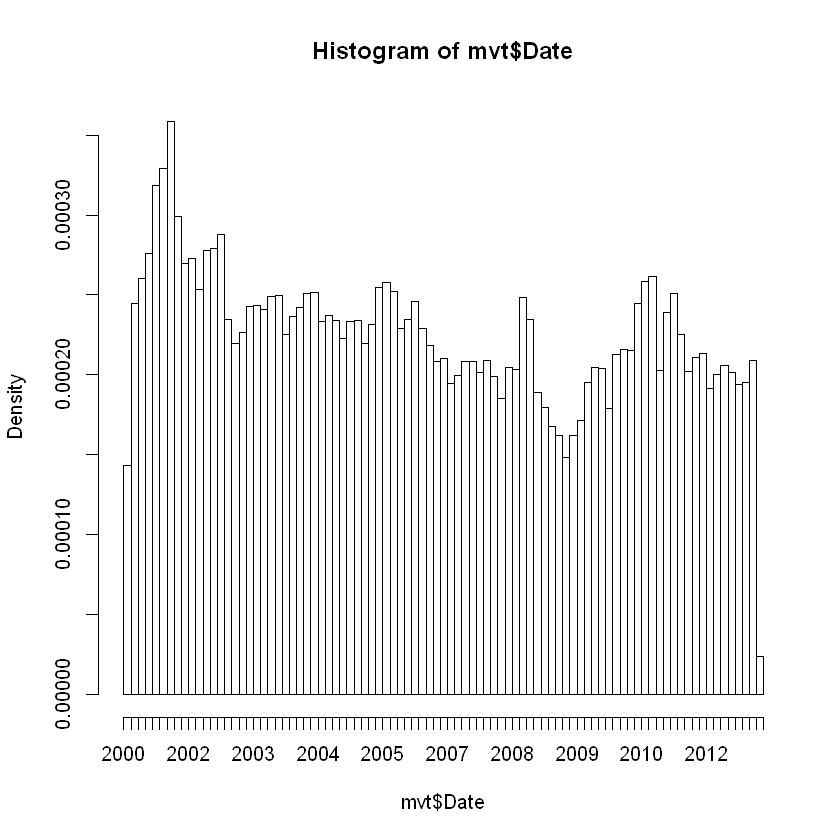

In [16]:
hist(mvt$Date, breaks=100)

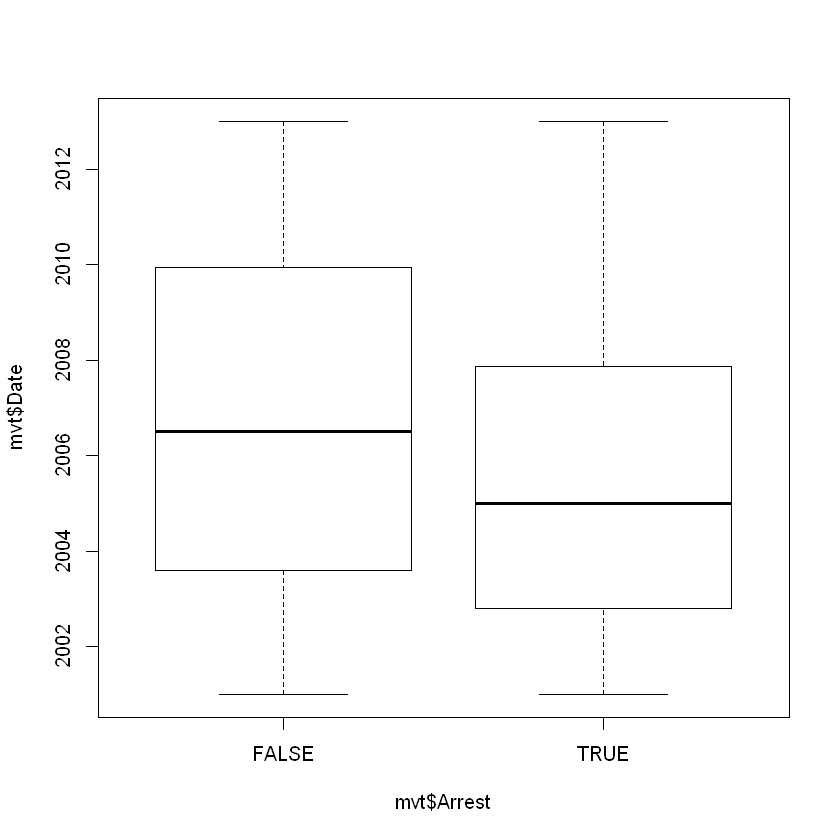

In [18]:
boxplot(mvt$Date ~ mvt$Arrest)

In [19]:
table(mvt$Arrest, mvt$Year)

       
         2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012
  FALSE 18517 16638 14859 15169 14956 14796 13068 13425 11327 14796 15012 13542
  TRUE   2152  2115  1798  1693  1528  1302  1212  1020   840   701   625   550

In [20]:
2152/(18517+2152)

[1] 0.1041173

In [21]:
1212/(13068+1212)

[1] 0.08487395

In [22]:
550/(13542+550)

[1] 0.03902924

In [23]:
sort(table(mvt$LocationDescription))


    AIRPORT BUILDING NON-TERMINAL - SECURE AREA 
                                              1 
                 AIRPORT EXTERIOR - SECURE AREA 
                                              1 
                                ANIMAL HOSPITAL 
                                              1 
                                APPLIANCE STORE 
                                              1 
                                      CTA TRAIN 
                                              1 
                        JAIL / LOCK-UP FACILITY 
                                              1 
                                      NEWSSTAND 
                                              1 
                                         BRIDGE 
                                              2 
              COLLEGE/UNIVERSITY RESIDENCE HALL 
                                              2 
                              CURRENCY EXCHANGE 
                                              2 
                   

In [24]:
Top5 = subset(mvt, LocationDescription=="STREET" | LocationDescription=="PARKING LOT/GARAGE(NON.RESID.)" | LocationDescription=="ALLEY" |LocationDescription=="GAS STATION" |LocationDescription=="DRIVEWAY - RESIDENTIAL")

In [25]:
summary(Top5)

       ID               Date                                LocationDescription
 Min.   :1310022   Min.   :2001-01-01   STREET                        :156564  
 1st Qu.:2827268   1st Qu.:2003-07-08   PARKING LOT/GARAGE(NON.RESID.): 14852  
 Median :4752514   Median :2006-05-16   ALLEY                         :  2308  
 Mean   :4959006   Mean   :2006-08-18   GAS STATION                   :  2111  
 3rd Qu.:7184899   3rd Qu.:2009-10-15   DRIVEWAY - RESIDENTIAL        :  1675  
 Max.   :9181151   Max.   :2012-12-31   ABANDONED BUILDING            :     0  
                                        (Other)                       :     0  
   Arrest         Domestic            Beat         District     CommunityArea  
 Mode :logical   Mode :logical   Min.   : 111   Min.   : 1.00   Min.   : 0.00  
 FALSE:163492    FALSE:177193    1st Qu.: 722   1st Qu.: 6.00   1st Qu.:22.00  
 TRUE :14018     TRUE :317       Median :1121   Median :10.00   Median :31.00  
                                 Mean   

In [26]:
Top5$LocationDescription = factor(Top5$LocationDescription)

In [27]:
str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 5 levels "ALLEY","DRIVEWAY - RESIDENTIAL",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "December" "December" "December" "December" ...
 $ Weekday            : chr  "Monday" "Monday" "Mond

In [28]:
table(Top5$LocationDescription,Top5$Arrest)

                                
                                  FALSE   TRUE
  ALLEY                            2059    249
  DRIVEWAY - RESIDENTIAL           1543    132
  GAS STATION                      1672    439
  PARKING LOT/GARAGE(NON.RESID.)  13249   1603
  STREET                         144969  11595

In [29]:
table(Top5$LocationDescription,Top5$Arrest,Top5$Weekday)

, ,  = Friday

                                
                                 FALSE  TRUE
  ALLEY                            342    43
  DRIVEWAY - RESIDENTIAL           238    19
  GAS STATION                      268    64
  PARKING LOT/GARAGE(NON.RESID.)  2057   274
  STREET                         22024  1749

, ,  = Monday

                                
                                 FALSE  TRUE
  ALLEY                            288    32
  DRIVEWAY - RESIDENTIAL           237    18
  GAS STATION                      215    65
  PARKING LOT/GARAGE(NON.RESID.)  1888   240
  STREET                         20706  1599

, ,  = Saturday

                                
                                 FALSE  TRUE
  ALLEY                            308    33
  DRIVEWAY - RESIDENTIAL           182    20
  GAS STATION                      270    68
  PARKING LOT/GARAGE(NON.RESID.)  1951   248
  STREET                         20502  1673

, ,  = Sunday

                          

In [30]:
table(Top5$LocationDescription, Top5$Weekday)

                                
                                 Friday Monday Saturday Sunday Thursday Tuesday
  ALLEY                             385    320      341    307      315     323
  DRIVEWAY - RESIDENTIAL            257    255      202    221      263     243
  GAS STATION                       332    280      338    336      282     270
  PARKING LOT/GARAGE(NON.RESID.)   2331   2128     2199   1936     2082    2073
  STREET                          23773  22305    22175  21756    22296   21888
                                
                                 Wednesday
  ALLEY                                317
  DRIVEWAY - RESIDENTIAL               234
  GAS STATION                          273
  PARKING LOT/GARAGE(NON.RESID.)      2103
  STREET                             22371